Dados de uma Instituição Financeira | Objetivo: tratar a base de dados da empresa

Listagem de correções realizadas:

1. Renomeação das colunas
2. Salários:
    
    2.1. substituição de valores nulos pela mediana
    
    2.2. substituição de outliers pela mediana
3. Gênero - padronização de valores e substituição de valores nulos pela moda (masculino)
4. Idade - substituição de idades fora do domínio (entre 18 e 120 anos) pela mediana
5. Exclusão de linhas duplicadas (clientes cadastrados mais de uma vez)
6. Estado - substituição de Estados fora do domínio (região sul) pela moda (RS)

In [1]:
import pandas as pd
import seaborn as sb
import statistics as st

In [2]:
# Importar e visualizar a base de dados
dataset = pd.read_csv("Churn.csv", sep=";")
display(dataset)

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
994,996,838,SC,Masculino,43,9,12310588,2,1,0,14576583.0,0
995,997,610,SC,Masculino,29,9,0,3,0,1,8391224.0,0
996,998,811,SC,Masculino,44,3,0,2,0,1,7843973.0,0
997,999,587,SC,Masculino,62,7,12128627,1,0,1,677692.0,0


In [3]:
# Renomear as colunas
dataset.columns = ["Id","Score","Estado","Gênero","Idade","Patrimônio","Saldo","Produtos","TemCartCredito","CartCreditoAtivo","Salário","Saiu"]
display(dataset)
# OBS: os salários apresentam valores elevados porque representam o valor dos salários anuais de cada cliente

,Id,Score,Estado,Gênero,Idade,Patrimônio,Saldo,Produtos,TemCartCredito,CartCreditoAtivo,Salário,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
994,996,838,SC,Masculino,43,9,12310588,2,1,0,14576583.0,0
995,997,610,SC,Masculino,29,9,0,3,0,1,8391224.0,0
996,998,811,SC,Masculino,44,3,0,2,0,1,7843973.0,0
997,999,587,SC,Masculino,62,7,12128627,1,0,1,677692.0,0


In [4]:
# Explorar dados categóricos
# Estado
agrupamento = dataset.groupby(["Estado"]).size()
display(agrupamento)
# Identificando erros de conformidade

Estado
PR    257
RP      1
RS    478
SC    258
SP      4
TD      1
dtype: int64

In [5]:
display(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                999 non-null    int64  
 1   Score             999 non-null    int64  
 2   Estado            999 non-null    object 
 3   Gênero            991 non-null    object 
 4   Idade             999 non-null    int64  
 5   Patrimônio        999 non-null    int64  
 6   Saldo             999 non-null    int64  
 7   Produtos          999 non-null    int64  
 8   TemCartCredito    999 non-null    int64  
 9   CartCreditoAtivo  999 non-null    int64  
 10  Salário           992 non-null    float64
 11  Saiu              999 non-null    int64  
dtypes: float64(1), int64(9), object(2)
memory usage: 93.8+ KB


None

<Axes: xlabel='Estado'>

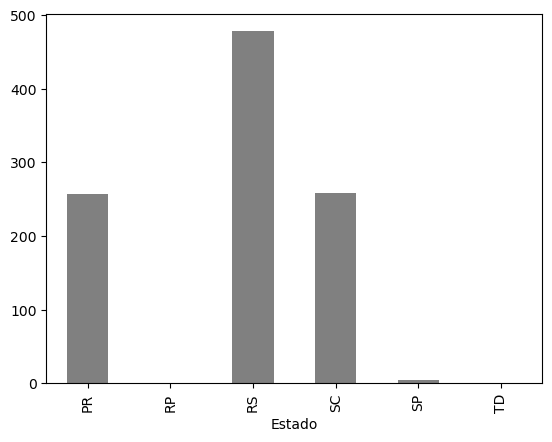

In [6]:
agrupamento.plot.bar(color = 'gray')

In [7]:
# Explorar dados categóricos
# Gênero
agrupamento = dataset.groupby(["Gênero"]).size()
display(agrupamento)
# Identificando erros de digitação do gênero

Gênero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

<Axes: xlabel='Gênero'>

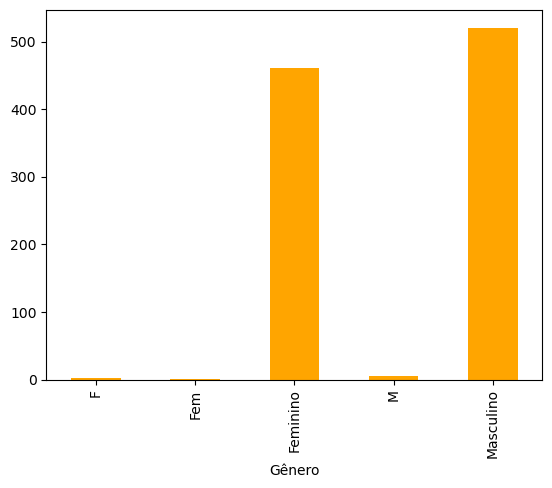

In [9]:
agrupamento.plot.bar(color = 'orange')

In [10]:
dataset['Score'].describe()

count    999.000000
mean     648.621622
std       98.264219
min      376.000000
25%      580.000000
50%      653.000000
75%      721.000000
max      850.000000
Name: Score, dtype: float64

Text(0.5, 1.0, 'Score')

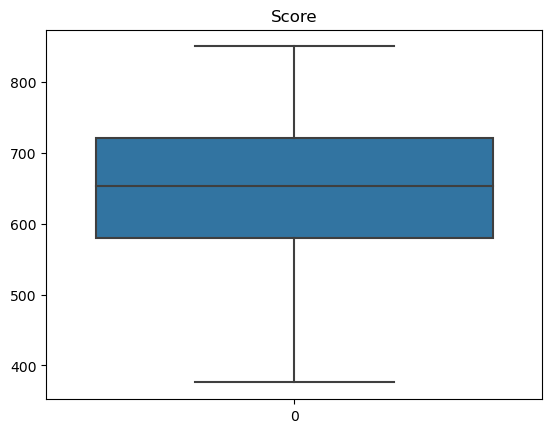

In [11]:
sb.boxplot(dataset['Score']).set_title('Score')

Text(0.5, 1.0, 'Score')

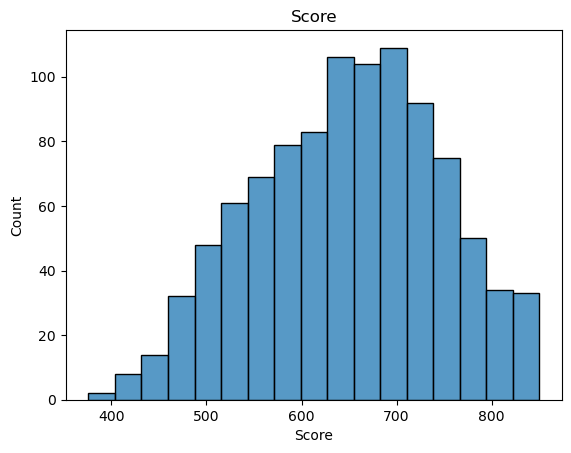

In [12]:
sb.histplot(dataset['Score']).set_title('Score')

In [13]:
# Idade
dataset['Idade'].describe()
# Identificando erro de valor (idade negativa e idade muito avançada)

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

Text(0.5, 1.0, 'Idade')

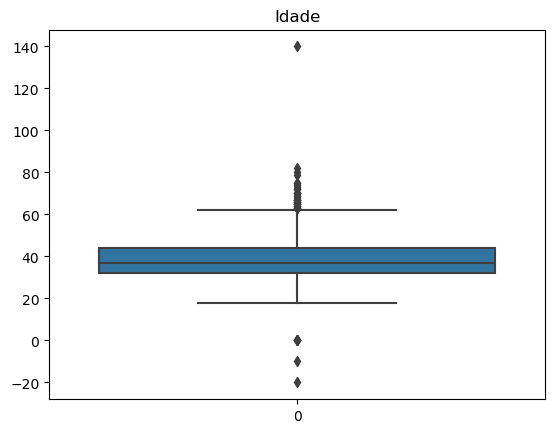

In [14]:
sb.boxplot(dataset['Idade']).set_title('Idade')

Text(0.5, 1.0, 'Idade')

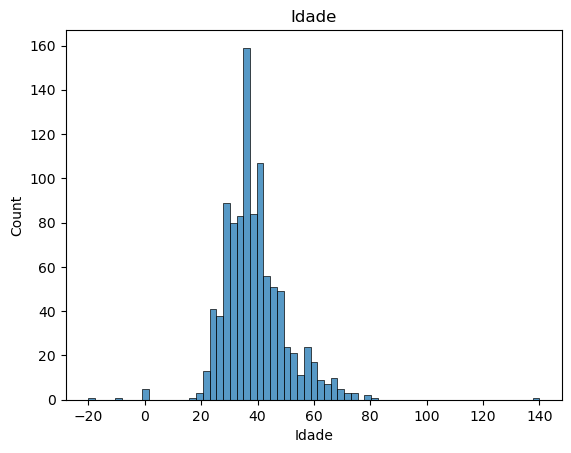

In [15]:
sb.histplot(dataset['Idade']).set_title('Idade')

In [16]:
dataset['Saldo'].describe()

count    9.990000e+02
mean     7.164928e+06
std      6.311840e+06
min      0.000000e+00
25%      0.000000e+00
50%      8.958835e+06
75%      1.258684e+07
max      2.117743e+07
Name: Saldo, dtype: float64

Text(0.5, 1.0, 'Saldo')

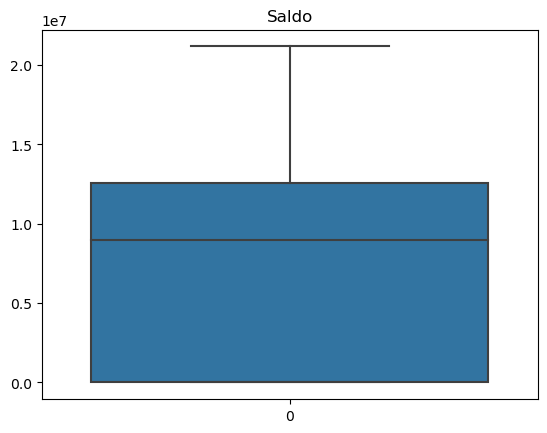

In [17]:
sb.boxplot(dataset['Saldo']).set_title('Saldo')

Text(0.5, 1.0, 'Saldo')

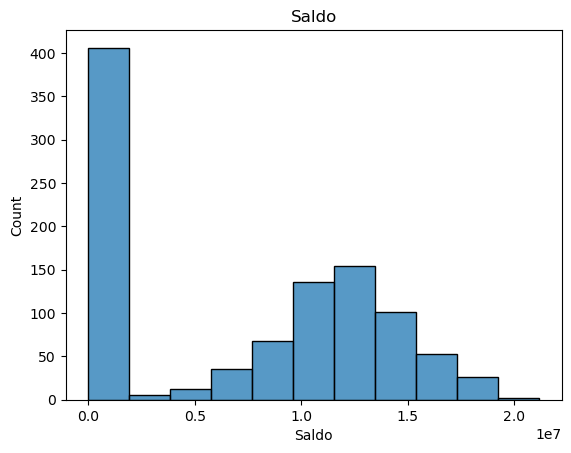

In [18]:
sb.histplot(dataset["Saldo"]).set_title('Saldo')

In [19]:
dataset["Salário"].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salário, dtype: float64

Text(0.5, 1.0, 'Salário')

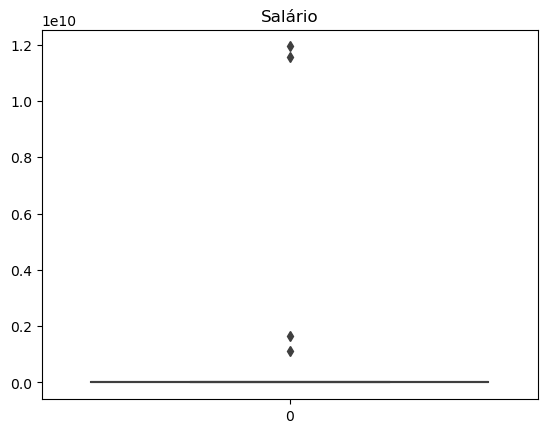

In [20]:
sb.boxplot(dataset['Salário']).set_title('Salário')

Text(0.5, 1.0, 'Salário')

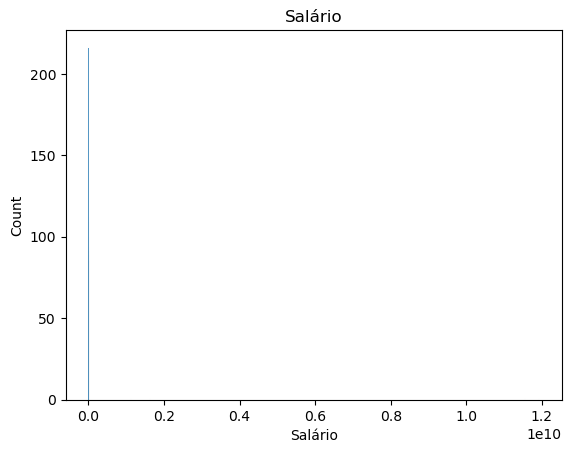

In [22]:
sb.histplot(dataset['Salário']).set_title('Salário')

In [23]:
# Identificando valores nulos
display(dataset.info())
dataset.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                999 non-null    int64  
 1   Score             999 non-null    int64  
 2   Estado            999 non-null    object 
 3   Gênero            991 non-null    object 
 4   Idade             999 non-null    int64  
 5   Patrimônio        999 non-null    int64  
 6   Saldo             999 non-null    int64  
 7   Produtos          999 non-null    int64  
 8   TemCartCredito    999 non-null    int64  
 9   CartCreditoAtivo  999 non-null    int64  
 10  Salário           992 non-null    float64
 11  Saiu              999 non-null    int64  
dtypes: float64(1), int64(9), object(2)
memory usage: 93.8+ KB


None

Id                  0
Score               0
Estado              0
Gênero              8
Idade               0
Patrimônio          0
Saldo               0
Produtos            0
TemCartCredito      0
CartCreditoAtivo    0
Salário             7
Saiu                0
dtype: int64

In [24]:
# Salários - substituir valores nulos pela mediana
mediana = st.median(dataset['Salário'])
print(mediana)

70518.0


In [25]:
# substituir valores nulos pela mediana
dataset['Salário'].fillna(mediana, inplace = True)
# Verificando se ainda existem valores nulos
dataset['Salário'].isnull().sum()

0

In [26]:
# Gênero - padronizar os valores referentes ao gênero e substituir os valores nulos pela moda (masculino)
agrupamento = dataset.groupby(['Gênero']).size()
display(agrupamento)
dataset['Gênero'].isnull().sum()

Gênero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

8

In [27]:
# Preenchendo com a moda
dataset['Gênero'].fillna('Masculino', inplace = True)
# Verificando se ainda existem valores nulos
dataset['Gênero'].isnull().sum()

0

In [28]:
dataset.isnull().sum()

Id                  0
Score               0
Estado              0
Gênero              0
Idade               0
Patrimônio          0
Saldo               0
Produtos            0
TemCartCredito      0
CartCreditoAtivo    0
Salário             0
Saiu                0
dtype: int64

Gênero
Feminino     464
Masculino    535
dtype: int64

<Axes: xlabel='Gênero'>

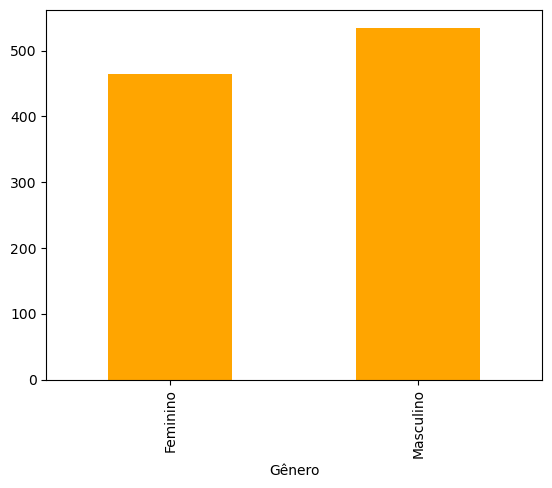

In [29]:
# Padronização dos valores referentes ao gênero
dataset.loc[dataset ['Gênero'] == 'M', 'Gênero'] = 'Masculino'
dataset.loc[dataset ['Gênero'] == 'F', 'Gênero'] = 'Feminino'
dataset.loc[dataset ['Gênero'] == 'Fem', 'Gênero'] = 'Feminino'
# Visualizando o resultado
agrupamento = dataset.groupby(['Gênero']).size()
display(agrupamento)
agrupamento.plot.bar(color = 'orange')

In [30]:
dataset['Gênero'].isnull().sum()

0

In [31]:
# Idades
# solucionar idades fora do domínio (definindo 18 anos idade mínima e 120 anos idade máxima)
# Vizualizar
dataset.loc[(dataset ['Idade'] < 18) | (dataset ['Idade'] > 120)]

,Id,Score,Estado,Gênero,Idade,Patrimônio,Saldo,Produtos,TemCartCredito,CartCreditoAtivo,Salário,Saiu
851,853,667,PR,Feminino,0,1,9713392,2,0,0,11331677.0,1
867,869,636,RS,Feminino,-10,1,17083346,1,1,0,11051028.0,1
887,889,585,RS,Masculino,0,2,0,2,1,1,1865777.0,0
930,932,661,SC,Masculino,0,6,13262898,1,0,0,3881267.0,0
931,933,564,PR,Masculino,0,9,10352275,2,1,1,3433821.0,0
947,949,715,RS,Feminino,0,5,11859041,1,1,1,568417.0,1
984,986,773,RS,Masculino,-20,1,12453278,2,0,1,1172357.0,0
990,992,655,RS,Masculino,140,5,93147,2,1,0,6621413.0,0


In [32]:
#Calcular a mediana
mediana = st.median(dataset['Idade'])
print(mediana)

37


In [33]:
# Substituindo idades fora do domínio pela mediana
dataset.loc[(dataset ['Idade'] < 18) | (dataset ['Idade'] > 120), 'Idade'] = mediana

In [34]:
# Verificando resultado
dataset.loc[(dataset ['Idade'] < 18) | (dataset ['Idade'] > 120)]

,Id,Score,Estado,Gênero,Idade,Patrimônio,Saldo,Produtos,TemCartCredito,CartCreditoAtivo,Salário,Saiu


In [35]:
# Buscando dados duplicados pelo Id
dataset[dataset.duplicated(['Id'], keep=False)]

,Id,Score,Estado,Gênero,Idade,Patrimônio,Saldo,Produtos,TemCartCredito,CartCreditoAtivo,Salário,Saiu
80,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
81,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0


In [36]:
# Excluindo duplicados
dataset.drop_duplicates(subset = 'Id', keep = 'first', inplace = True)
# Verificando
dataset[dataset.duplicated(['Id'], keep=False)]

,Id,Score,Estado,Gênero,Idade,Patrimônio,Saldo,Produtos,TemCartCredito,CartCreditoAtivo,Salário,Saiu


In [37]:
# Estados fora do domínio (domínio = região sul)
agrupamento = dataset.groupby(['Estado']).size()
display(agrupamento)

Estado
PR    257
RP      1
RS    477
SC    258
SP      4
TD      1
dtype: int64

In [38]:
# Substituindo estados fora do domínio pela moda (RS)
dataset.loc[dataset ['Estado'] == 'RP', 'Estado'] = 'RS'
dataset.loc[dataset ['Estado'] == 'SP', 'Estado'] = 'RS'
dataset.loc[dataset ['Estado'] == 'TD', 'Estado'] = 'RS'
# Verificando
agrupamento = dataset.groupby(['Estado']).size()
display(agrupamento)

Estado
PR    257
RS    483
SC    258
dtype: int64

In [39]:
# Outliers em salário (tendo como outliers valores que forem 2 vezes maiores que o desvio padrão)
desvio_padrão = st.stdev(dataset['Salário'])
print(desvio_padrão)

528988918.4679201


In [40]:
# Buscar outliers
dataset.loc[dataset ["Salário"] >= 2 * desvio_padrão]
# OBS: os salários estão representados em forma de notação científica

,Id,Score,Estado,Gênero,Idade,Patrimônio,Saldo,Produtos,TemCartCredito,CartCreditoAtivo,Salário,Saiu
7,8,376,PR,Feminino,29,4,11504674,4,1,0,1.193469e+10,1
116,118,668,PR,Feminino,37,6,1678644,1,1,0,1.156383e+10,0
170,172,484,RS,Feminino,29,4,13011439,1,1,0,1.640179e+09,0
230,232,673,RS,Masculino,72,1,0,2,0,1,1.119812e+09,0


In [41]:
# Calculando a mediana
mediana = st.median(dataset ['Salário'])
print(mediana)

8637195.5


In [42]:
# Substituindo outliers pela mediana
dataset.loc[dataset ['Salário'] >= 2 * desvio_padrão, 'Salário'] = mediana
# Verificando
dataset.loc[dataset ["Salário"] >= 2 * desvio_padrão]

,Id,Score,Estado,Gênero,Idade,Patrimônio,Saldo,Produtos,TemCartCredito,CartCreditoAtivo,Salário,Saiu


In [45]:
display(dataset)

,Id,Score,Estado,Gênero,Idade,Patrimônio,Saldo,Produtos,TemCartCredito,CartCreditoAtivo,Salário,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
994,996,838,SC,Masculino,43,9,12310588,2,1,0,14576583.0,0
995,997,610,SC,Masculino,29,9,0,3,0,1,8391224.0,0
996,998,811,SC,Masculino,44,3,0,2,0,1,7843973.0,0
997,999,587,SC,Masculino,62,7,12128627,1,0,1,677692.0,0


# OBS: a base de dados corrigida tem uma linha a menos que a base de dados original, pois uma das linhas estava duplicada e foi excluída

In [44]:
dataset.shape

(998, 12)